In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [64]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [65]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [67]:
df.drop(['area_type','availability','balcony','society'],axis=1, inplace=True)

In [68]:
#df['size'] = df['size'].str.split(" ").str.get(0)
#df['size'] = df["size"].astype("float")#  change data typre of size object to float
#df['size'] = df['size'].repalce(np.nan ,"0")

In [69]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [70]:
df['size']=df['size'].fillna('2 BHK')

In [71]:
df['size'] = df['size'].str.split(" ").str.get(0)
df['size'] = df["size"].astype("float")#  change data typre of size object to float

In [72]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [73]:
df['location']= df['location'].fillna("Sarjapur  Road")

In [74]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [75]:

df['bath']= df['bath'].fillna(df.bath.median())

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  float64
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


In [77]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [78]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [79]:
def converrRange(X):
    
    temp= X.split("-")
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(X)
    except:
        return None

In [80]:
df["total_sqft"] = df["total_sqft"].apply(converrRange)

In [81]:
df["location"] = df["location"].apply(lambda x: x.strip())
local_counts = df["location"].value_counts()

In [82]:
localcount_less_10 = local_counts[local_counts<10]
localcount_less_10

Vishwanatha Nagenahalli           9
Chennammana Kere                  9
2nd Phase JP Nagar                9
Jakkur Plantation                 9
B Narayanapura                    9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: location, Length: 1040, dtype: int64

In [83]:
df["location"] = df["location"].apply(lambda x: 'other' if x in localcount_less_10 else x)

In [84]:
df.location.value_counts()

other                  2755
Whitefield              541
Sarjapur  Road          400
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: location, Length: 255, dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  float64
 2   total_sqft  13274 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(4), object(1)
memory usage: 520.4+ KB


<Axes: >

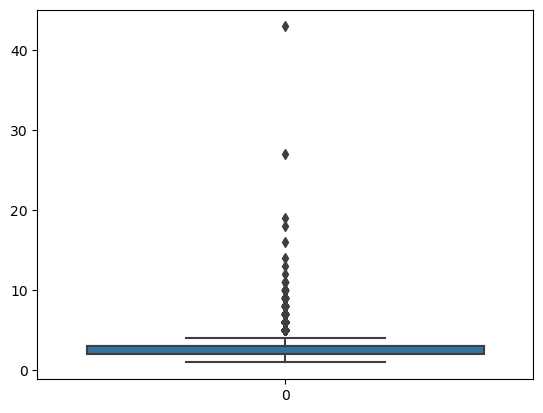

In [86]:
sns.boxplot(df['size'])

In [87]:
df['size'].describe()

count    13320.000000
mean         2.802778
std          1.294496
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         43.000000
Name: size, dtype: float64

In [88]:
percentile75 = df['size'].quantile(0.75)
percentile75

3.0

In [89]:
percentile25 = df['size'].quantile(0.25)
percentile25

2.0

In [90]:
iqr = percentile75 - percentile25
iqr

1.0

In [91]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [92]:
upper_limit

4.5

In [93]:
lower_limit

0.5

In [94]:
df[df['size']> upper_limit]

,location,size,total_sqft,bath,price
9,other,6.0,1020.0,6.0,370.0
45,HSR Layout,8.0,600.0,9.0,200.0
58,Murugeshpalya,6.0,1407.0,4.0,150.0
64,Bommanahalli,8.0,3000.0,8.0,140.0
68,Devarachikkanahalli,8.0,1350.0,7.0,85.0
...,...,...,...,...,...
13281,Margondanahalli,5.0,1375.0,5.0,125.0
13300,Hosakerehalli,5.0,1500.0,6.0,145.0
13303,Vidyaranyapura,5.0,774.0,5.0,70.0
13311,Ramamurthy Nagar,7.0,1500.0,9.0,250.0


In [95]:
df[df['size']<lower_limit]

,location,size,total_sqft,bath,price


In [96]:
df['size'] = np.where(
    df['size'] > upper_limit,
    upper_limit,
    np.where(
        df['size'] < lower_limit,
        lower_limit,
        df['size']
    )
)

<Axes: >

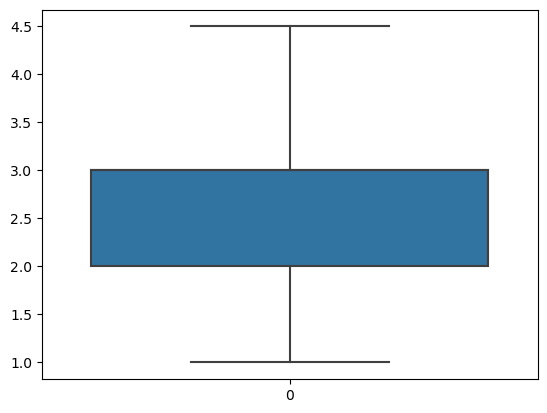

In [97]:
sns.boxplot(df['size'])

/var/folders/2b/69kb_prn56l68d8p30cp3hg00000gn/T/ipykernel_45422/1004771161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['size'])


<Axes: xlabel='size', ylabel='Density'>

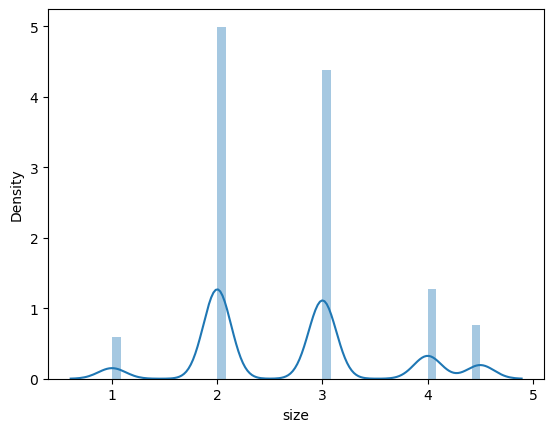

In [98]:
sns.distplot(df['size'])

<Axes: >

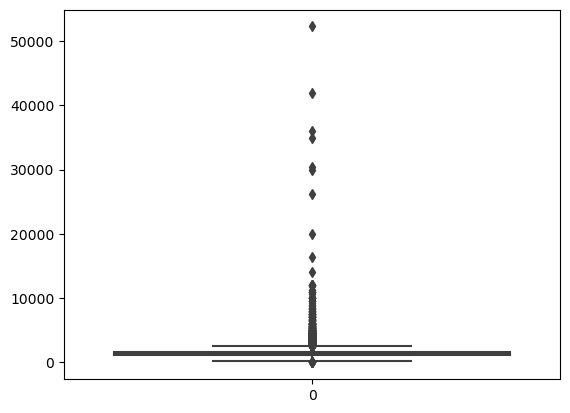

In [99]:
sns.boxplot(df['total_sqft'])


/var/folders/2b/69kb_prn56l68d8p30cp3hg00000gn/T/ipykernel_45422/2151427126.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_sqft'])


<Axes: xlabel='total_sqft', ylabel='Density'>

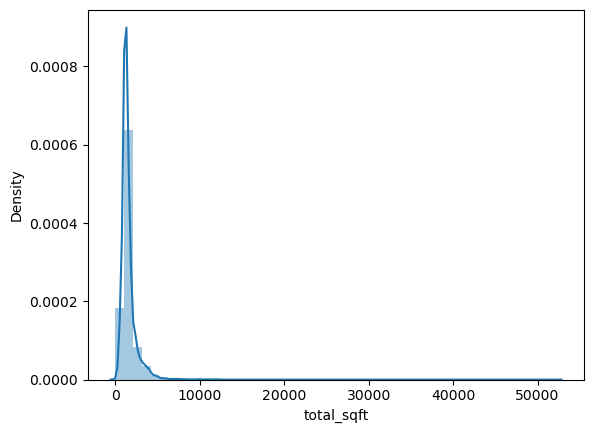

In [100]:
sns.distplot(df['total_sqft'])


In [101]:
percentile75 = df['total_sqft'].quantile(0.75)
percentile75

1680.0

In [102]:
percentile25 = df['total_sqft'].quantile(0.25)
percentile25

1100.0

In [103]:
iqr = percentile75 - percentile25
iqr

580.0

In [104]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [105]:
df['total_sqft'] = np.where(
    df['total_sqft'] > upper_limit,
    upper_limit,
    np.where(
        df['total_sqft'] < lower_limit,
        lower_limit,
        df['total_sqft']
    )
)

<Axes: >

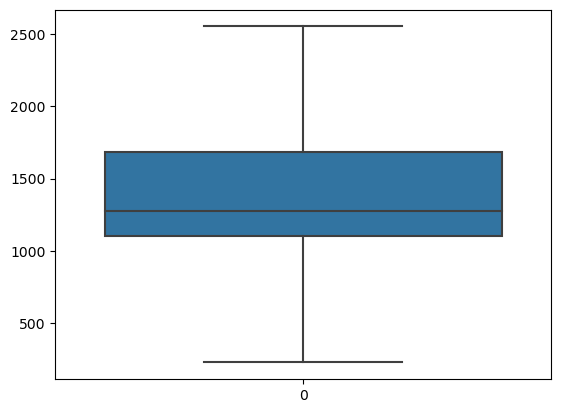

In [106]:
sns.boxplot(df['total_sqft'])

<Axes: >

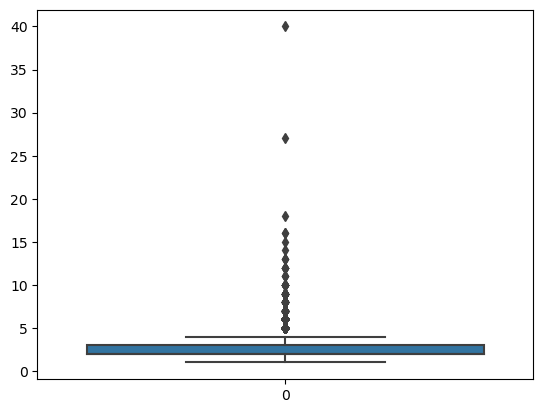

In [107]:
sns.boxplot(df['bath'])

In [108]:
percentile75 = df['bath'].quantile(0.75)
percentile75

3.0

In [109]:
percentile25 = df['bath'].quantile(0.25)
percentile25

2.0

In [110]:
iqr = percentile75 - percentile25
iqr

1.0

In [111]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [112]:
upper_limit

4.5

In [113]:
df['bath'] = np.where(
    df['bath'] > upper_limit,
    upper_limit,
    np.where(
        df['bath'] < lower_limit,
        lower_limit,
        df['bath']
    )
)

<Axes: >

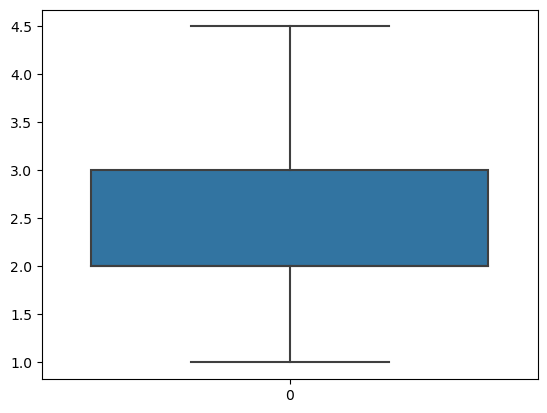

In [115]:
sns.boxplot(df['bath'])

<Axes: >

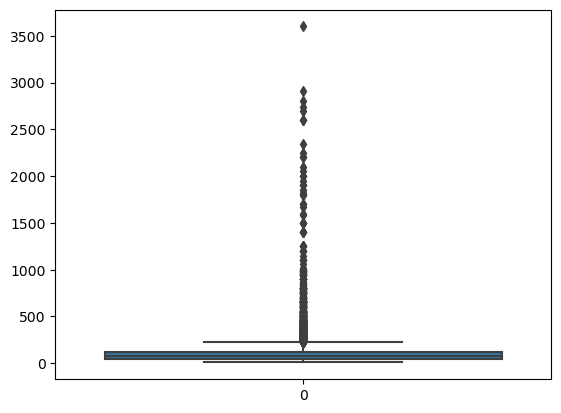

In [117]:
sns.boxplot(df['price'])

In [119]:
percentile75 = df['price'].quantile(0.75)
percentile75

120.0

In [118]:
percentile25 = df['price'].quantile(0.25)
percentile25

50.0

In [120]:
iqr = percentile75 - percentile25
iqr

70.0

In [121]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [122]:
upper_limit

225.0

In [123]:
df['price'] = np.where(
    df['price'] > upper_limit,
    upper_limit,
    np.where(
        df['price'] < lower_limit,
        lower_limit,
        df['price']
    )
)

<Axes: >

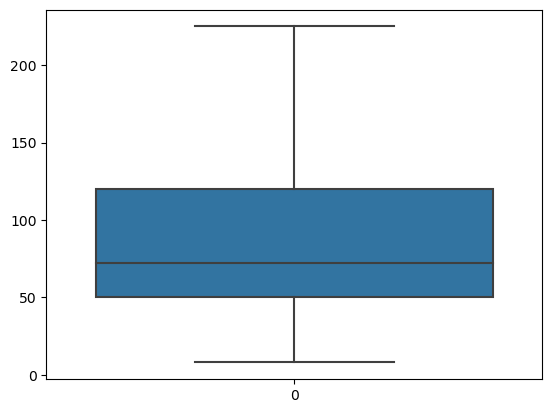

In [124]:
sns.boxplot(df['price'])

In [125]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2550.0,4.5,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,4.5,2550.0,4.0,225.00
13316,other,4.0,2550.0,4.5,225.00
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00
13318,Padmanabhanagar,4.0,2550.0,4.0,225.00


In [128]:
df=pd.concat([df,pd.get_dummies(df.location)],axis=1)

In [131]:
df=df.drop("location",axis=1)

In [132]:
df

,size,total_sqft,bath,price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,1056.0,2.0,39.07,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2550.0,4.5,120.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,62.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,95.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,51.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,4.5,2550.0,4.0,225.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,4.0,2550.0,4.5,225.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,2.0,1141.0,2.0,60.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4.0,2550.0,4.0,225.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df.isnull().sum()

size                   0
total_sqft             0
bath                   0
price                  0
1st Block Jayanagar    0
                      ..
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
other                  0
Length: 259, dtype: int64

In [150]:
df.dropna(inplace=True)

In [151]:
x=df.drop("price",axis=1)
y=df["price"]

In [153]:
x.isnull().sum()

size                     0
total_sqft               0
bath                     0
1st Block Jayanagar      0
1st Block Koramangala    0
                        ..
Yelahanka                0
Yelahanka New Town       0
Yelenahalli              0
Yeshwanthpur             0
other                    0
Length: 258, dtype: int64

In [154]:
x.shape

(13274, 258)

In [155]:
y.shape

(13274,)

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=51)

In [157]:
x_train.isnull().sum()

size                     0
total_sqft               0
bath                     0
1st Block Jayanagar      0
1st Block Koramangala    0
                        ..
Yelahanka                0
Yelahanka New Town       0
Yelenahalli              0
Yeshwanthpur             0
other                    0
Length: 258, dtype: int64

In [158]:
sc = StandardScaler()
sc.fit(x_train)
x_train =sc.transform(x_train)
x_test =sc.transform(x_test)

In [159]:
lr = LinearRegression()

In [160]:
lr.fit(x_train,y_train)

LinearRegression()

In [161]:
lr.predict(x_test)

array([116.2798245 , 112.06336377,  90.41556669, ...,  59.18802763,
       130.60599638,  69.59427763])

In [162]:
y_test

7396      87.00
9502      56.00
5106      71.00
13085     71.00
9133      32.00
          ...  
8739      90.00
9692      25.12
3254      60.00
275      132.00
2693      55.00
Name: price, Length: 2655, dtype: float64

In [163]:
lr.score(x_test,y_test)

0.721722825723816

In [164]:
from sklearn.linear_model import Ridge, Lasso

In [165]:
rd = Ridge()
ls = Lasso()

In [166]:
rd.fit(x_train,y_train)

Ridge()

In [167]:
ls.fit(x_train,y_train)

Lasso()

In [168]:
rd.score(x_test,y_test)

0.7217170152703585

In [169]:
ls.score(x_test,y_test)

0.7027719468947577